## Background & Context
Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective
1. Explore and visualize the dataset.
2. Build a linear regression model to predict the log of rental price
3. Generate a set of insights and recommendations that will help the business.

### Data Dictionary
    1. id:Property ID
    2. room_type:Type of Room in the property
    3. accommodates:How many adults can this property accomodate
    4. bathrooms:Number of bathrooms in the property
    5. cancellation_policy:Cancellation policy of the property
    6. cleaning_fee:This denotes whether the property's cleaning fee is included in the rent or not
    7. instant_bookable:It indicates whether an instant booking facility is available or not
    8. review_scores_rating:The review rating score of the property
    9. bedrooms:Number of bedrooms in the property
    10. beds:Total number of beds in the property
    11. log_price:Log of the rental price of the property for a fixed period 

# 1. EDA

### Importing libraries

In [389]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# For Validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

### Reading the data

In [390]:
data = pd.read_csv("AirBNB.csv")

In [391]:
df = data.copy()

In [392]:
data.shape

(74111, 11)

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [350]:
data.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [394]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
data.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


In [476]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111,NaN,NaN,NaN,1.12666e+07,6.08173e+06,344,6.26196e+06,1.22541e+07,1.64023e+07,2.12309e+07
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108,NaN,NaN,NaN,3.15512,2.1536,1,2,2,4,16
bathrooms,73908,NaN,NaN,NaN,1.23527,0.582054,0,1,1,1,8
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389,NaN,NaN,NaN,94.0674,7.83656,20,92,96,100,100
bedrooms,74019,NaN,NaN,NaN,1.2658,0.852149,0,1,1,1,10
beds,73980,NaN,NaN,NaN,1.71087,1.25414,0,1,1,2,18


Looking at the column "id", we can see that it's safe to drop this colum right away because it is not informative and so we won't be using it.

In [395]:
data.drop(['id'],axis=1,inplace=True)

In [453]:
data.shape

(74098, 10)

#### Observations
1. room_type variable has 3. cancellation_policy has 3, cleaning_fee has 2 and instant_bookable has 2 unique variables.
2. Majority of the properties are of room type - Entire home/apt.
3. Majority of hosts (approx. 73%) charge cleaning fee.
4. The avg. review rating is 94 which is close to median. Majority of the ratings are between 90 - 100.
5. There are missing values in few columns. We will need to look at them in before modelling.
6. Majority of properties are 1 bedroom.
7. Majority of properties have 1 or 2 beds, 1 bedroom and 1 bathroom.
8. Majority of the properties are allow accommodation of 2-4 people.
9. The log price is normally distributed with mean and median almost same - 4.7.
10. 73% of properties are not instant bookable.

### Missing value treatment

In [397]:
# Checking the sum of null values in each column
data.isna().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [398]:
# we will remove the rows that have null values in the object datatype columns - 'room_type', 'cancellation_policy', 'cleaning_fee'
data.dropna(axis=0, subset=['room_type', 'cancellation_policy', 'cleaning_fee'], inplace=True )

In [399]:
# we will replace missing values with 0 for bedrooms, beds & bathrooms and with median for review_scores_ratings.
data.bedrooms.fillna(0, inplace = True)
data.bathrooms.fillna(0, inplace = True)
data.beds.fillna(0, inplace = True)
data.review_scores_rating.fillna(data['review_scores_rating'].median(), inplace = True)

In [400]:
data.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [401]:
data.shape

(74098, 10)

In [402]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74098,3,Entire home/apt,41302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74098,NaN,NaN,NaN,3.15523,2.15369,1,2,2,4,16
bathrooms,74098,NaN,NaN,NaN,1.23195,0.584805,0,1,1,1,8
cancellation_policy,74098,3,strict,32498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74098,2,True,54393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74098,2,f,54650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,74098,NaN,NaN,NaN,94.5033,6.94348,20,93,96,99,100
bedrooms,74098,NaN,NaN,NaN,1.26429,0.852825,0,1,1,1,10
beds,74098,NaN,NaN,NaN,1.70789,1.25516,0,1,1,2,18
log_price,74098,NaN,NaN,NaN,4.78206,0.717414,0,4.31749,4.70953,5.22036,7.6004


### Univariate analysis

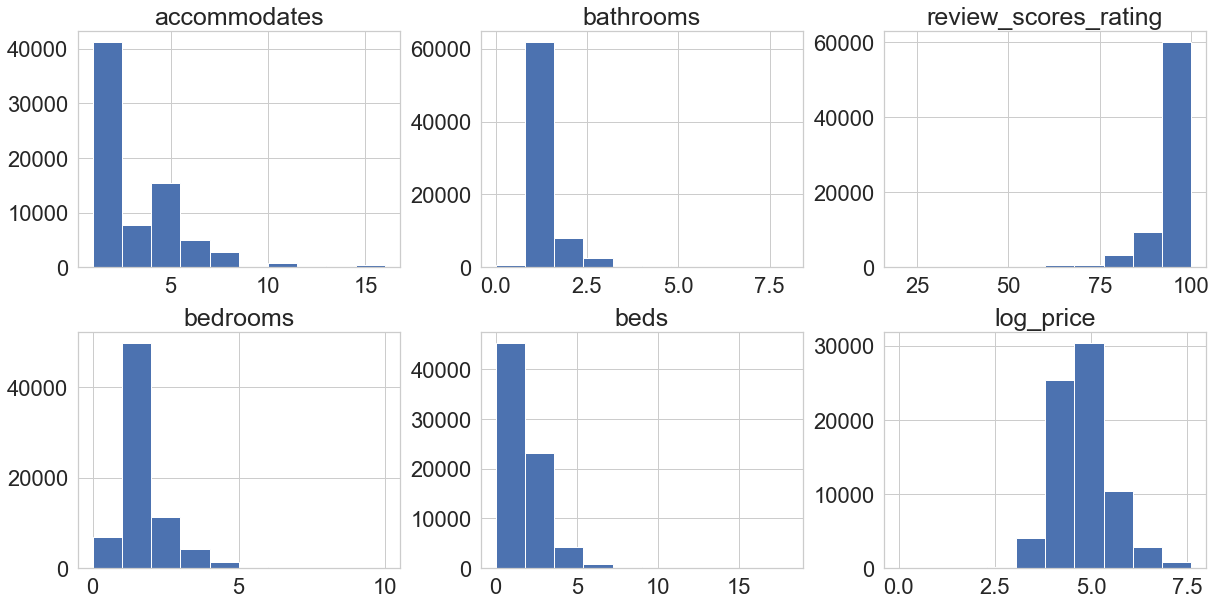

In [457]:
# lets plot histogram of all plots
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(numeric_columns)):
    plt.subplot(18,3,i+1)
    plt.hist(data[numeric_columns[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(numeric_columns[i],fontsize=25)
    

plt.show()

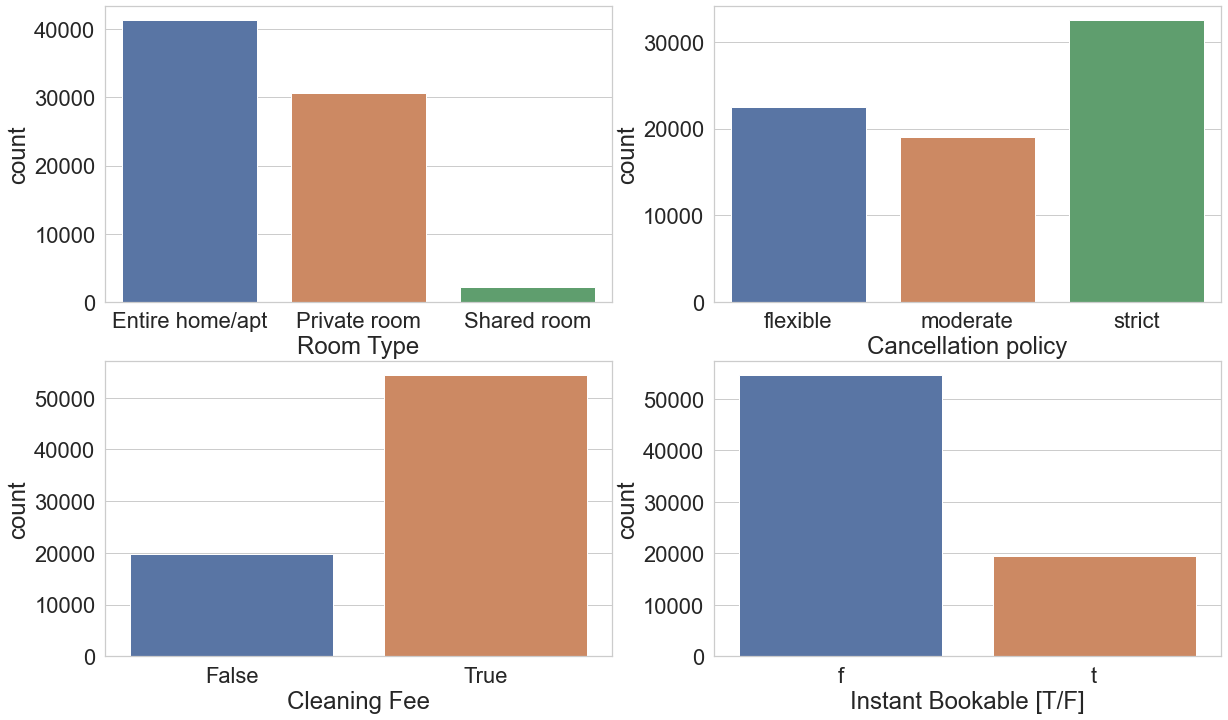

In [461]:
# Using subplots to plot all the categorical variables 
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(data['room_type'])
plt.xlabel('Room Type')

plt.subplot(4,2,2)
sns.countplot(data['cancellation_policy'])
plt.xlabel('Cancellation policy')

plt.subplot(4,2,3)
sns.countplot(data['cleaning_fee'])
plt.xlabel('Cleaning Fee')

plt.subplot(4,2,4)
sns.countplot(data['instant_bookable'])
plt.xlabel('Instant Bookable [T/F]')

plt.show()

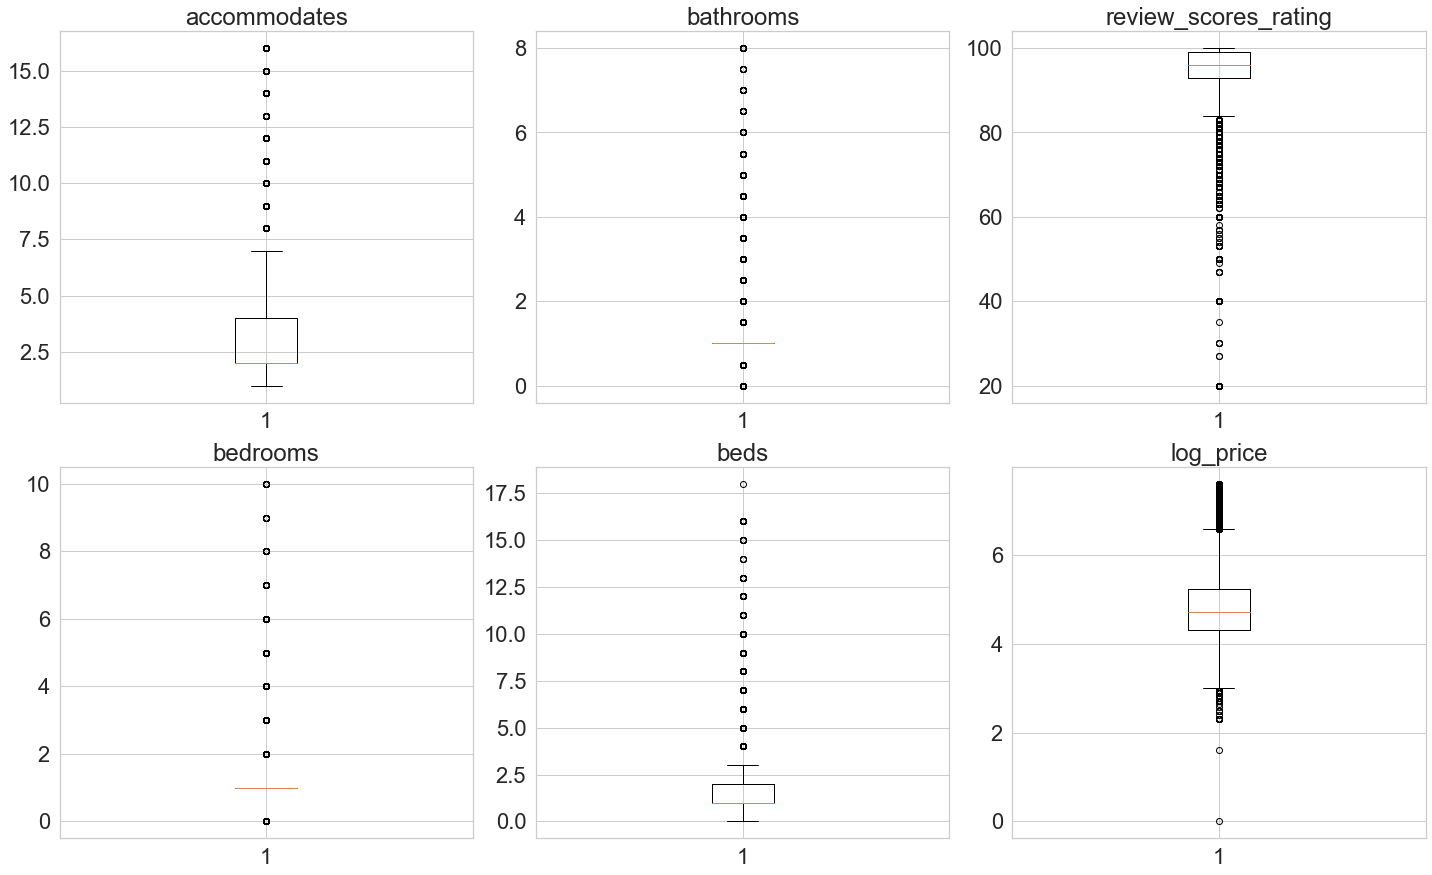

In [460]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,3,i+1)
                     plt.boxplot(data[variable], vert=True)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Multi-variate analysis

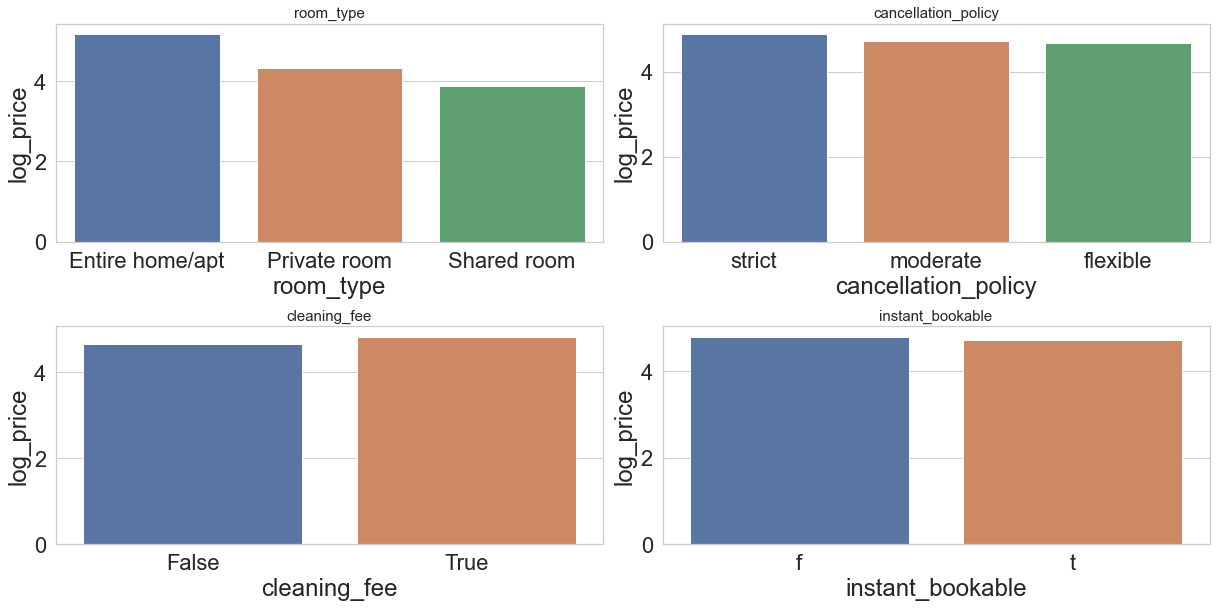

In [405]:
plt.figure(figsize=(17,75))
obj_col = data.select_dtypes(include=object).columns.tolist()
for i in range(len(obj_col)):
    plt.subplot(18,2,i+1)
    sns.barplot(x=obj_col[i], y=data['log_price'], data=data, ci=None)
    plt.tight_layout()
    plt.title(obj_col[i],fontsize=15)
   
plt.show()

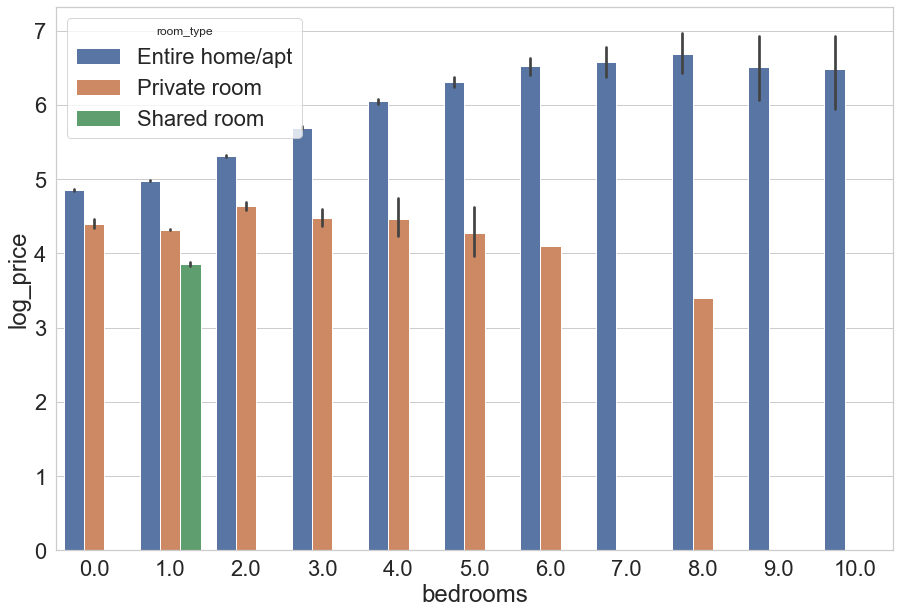

In [471]:
plt.figure(figsize=(15,10))
sns.barplot(x='bedrooms', y='log_price', data=data, hue='room_type')
plt.show()

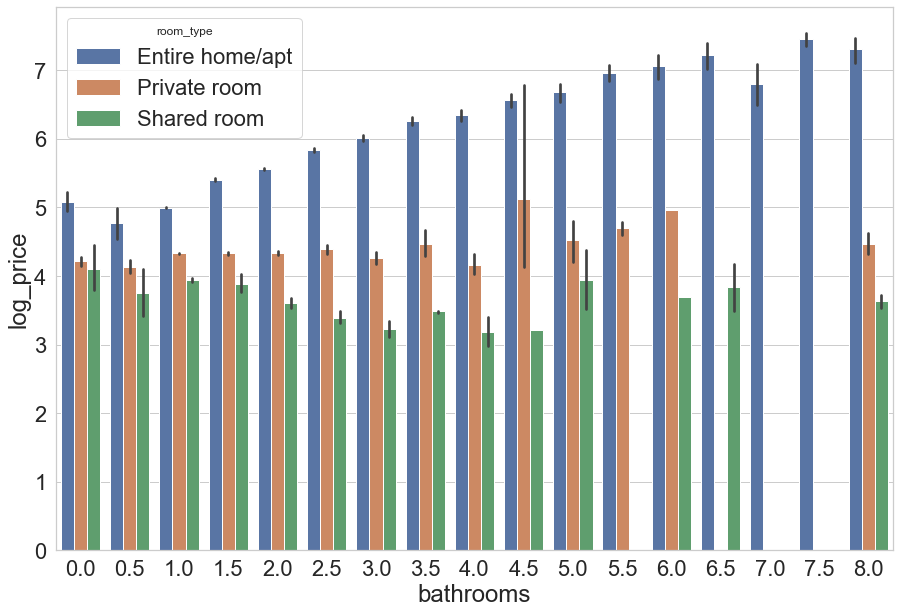

In [473]:
plt.figure(figsize=(15,10))
sns.barplot(x='bathrooms', y='log_price', data=data, hue='room_type')
plt.show()

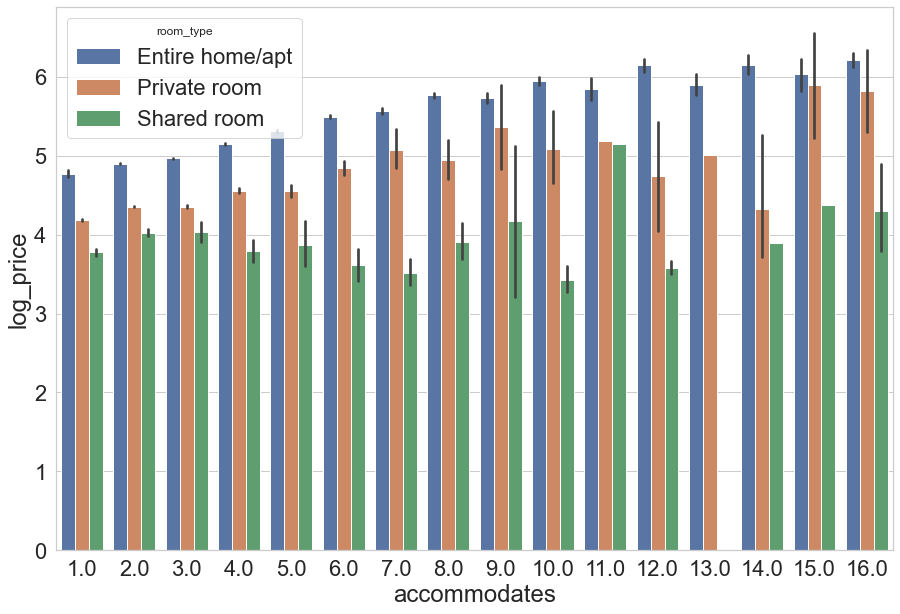

In [474]:
plt.figure(figsize=(15,10))
sns.barplot(x='accommodates', y='log_price', data=data, hue='room_type')
plt.show()

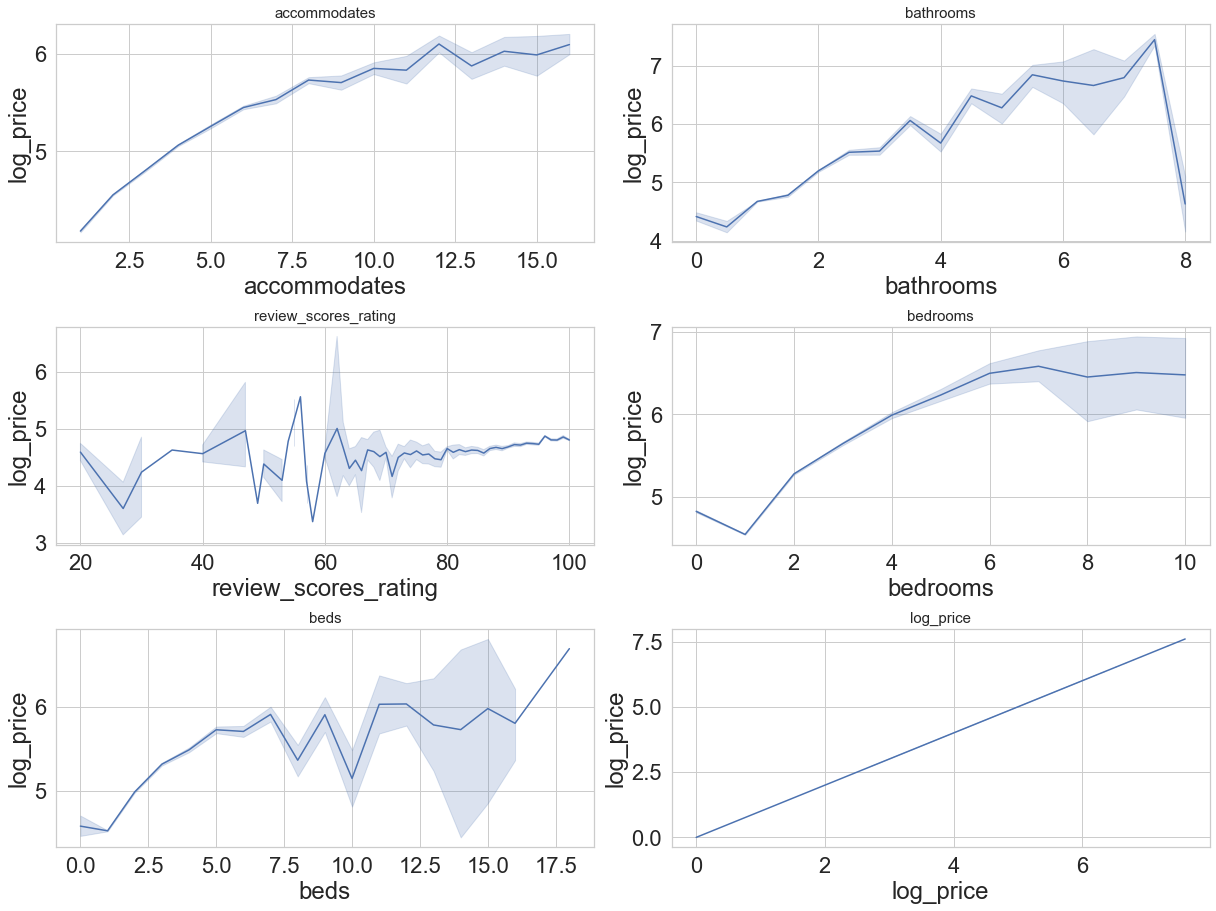

In [406]:
plt.figure(figsize=(17,75))

for i in range(len(numeric_columns)):
    plt.subplot(18,2,i+1)
    sns.lineplot(x=numeric_columns[i], y=data['log_price'], data=data)
    plt.tight_layout()
    plt.title(numeric_columns[i],fontsize=15)

plt.show()

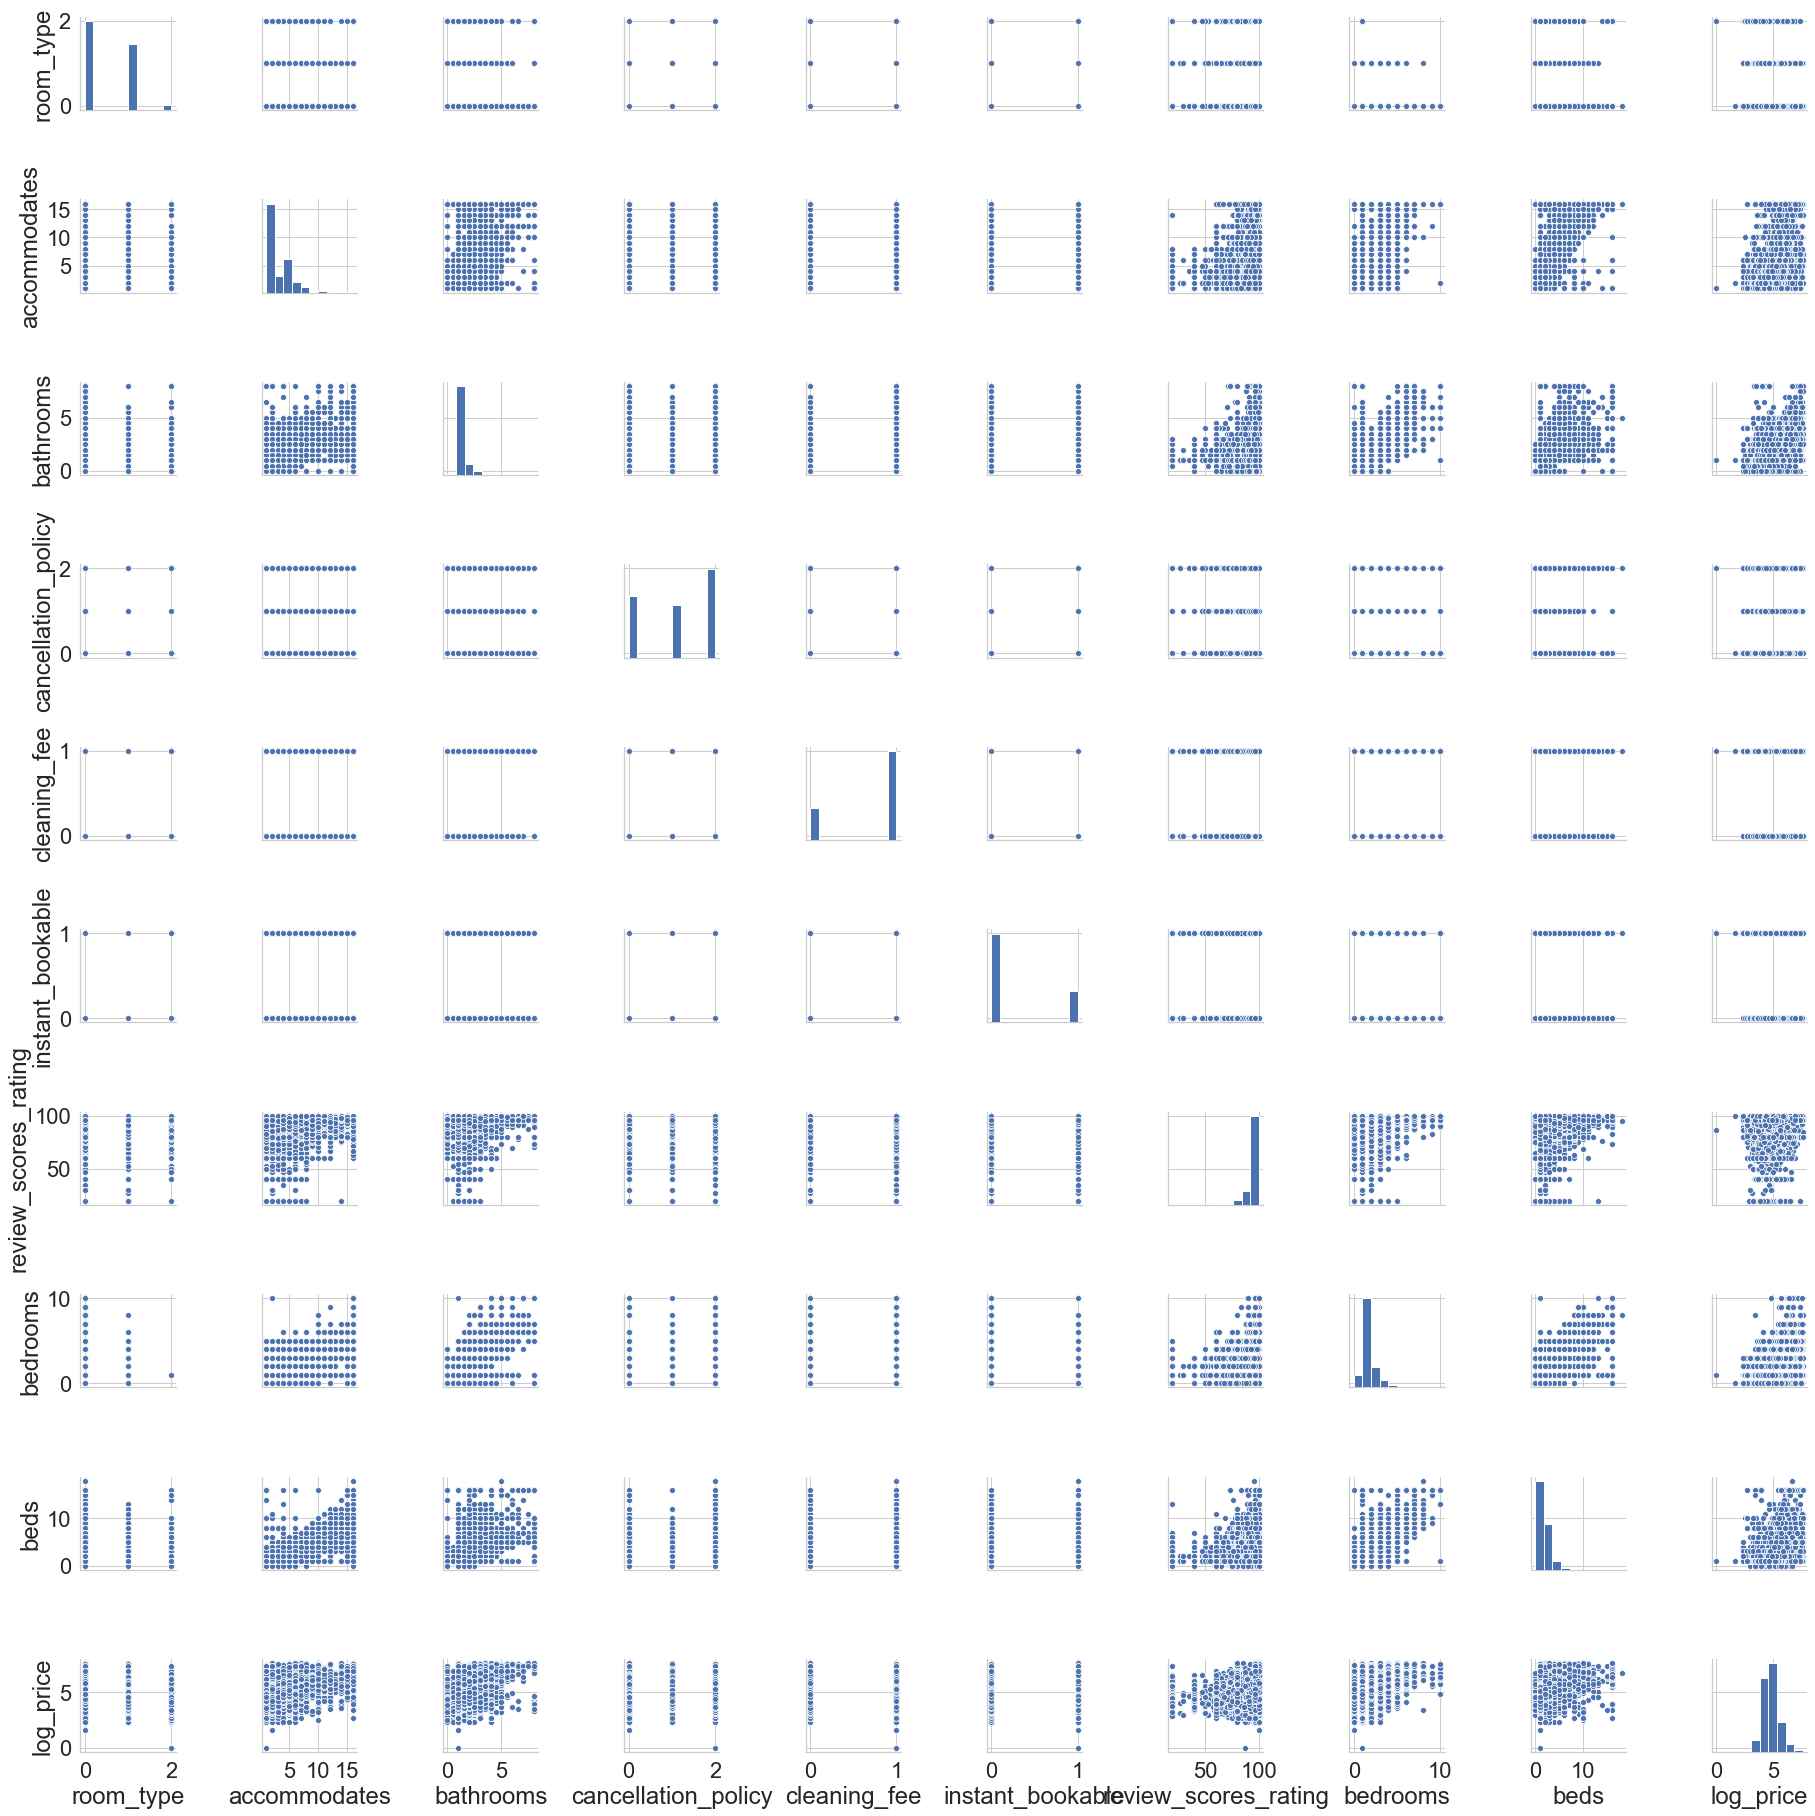

In [407]:
#Perform Label encoding on the categorical variables so that they can be included in pairplot to 
#analyse the correltaion with other numerical variables
# Reference from google (https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)
from sklearn.preprocessing import LabelEncoder
data_encode = data.copy()
data_encode.loc[:,['room_type','cancellation_policy','cleaning_fee','instant_bookable']] = data.loc[:,['room_type','cancellation_policy','cleaning_fee','instant_bookable']].apply(LabelEncoder().fit_transform)

#pairplot for all the variables
sns.pairplot(data_encode)
plt.show()

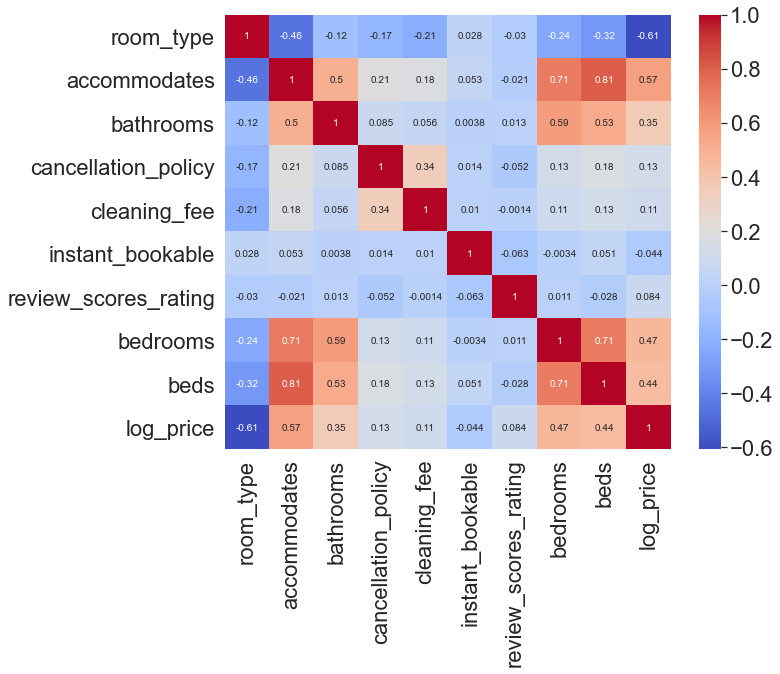

In [408]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encode.corr(), annot=True, cmap="coolwarm")

# Data Preprocessing

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74098 non-null  object 
 1   accommodates          74098 non-null  float64
 2   bathrooms             74098 non-null  float64
 3   cancellation_policy   74098 non-null  object 
 4   cleaning_fee          74098 non-null  object 
 5   instant_bookable      74098 non-null  object 
 6   review_scores_rating  74098 non-null  float64
 7   bedrooms              74098 non-null  float64
 8   beds                  74098 non-null  float64
 9   log_price             74098 non-null  float64
dtypes: float64(6), object(4)
memory usage: 8.7+ MB


In [410]:
# Converting object type column to category type
data['room_type'] = data['room_type'].astype('category')
data['cancellation_policy'] = data['cancellation_policy'].astype('category')
data['cleaning_fee'] = data['cleaning_fee'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             74098 non-null  category
 1   accommodates          74098 non-null  float64 
 2   bathrooms             74098 non-null  float64 
 3   cancellation_policy   74098 non-null  category
 4   cleaning_fee          74098 non-null  category
 5   instant_bookable      74098 non-null  category
 6   review_scores_rating  74098 non-null  float64 
 7   bedrooms              74098 non-null  float64 
 8   beds                  74098 non-null  float64 
 9   log_price             74098 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 6.7 MB


### Outlier treatment

We tried treating the outliers but it had no affect on R2 and/or adj.R2, rather it affected the residual distribution. Hence, we decided not to treat the outliers.

### Missing value treatment
We have already done the misssing-value treatment durign EDA. It is not needed now.

# Model building

In [412]:
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [413]:
#Defining X and y variables
X = data.drop(['log_price'], axis=1)
y = data[['log_price']]

In [414]:
print(X.shape)
print(y.shape)

(74098, 9)
(74098, 1)


In [415]:
X = pd.get_dummies(X, columns=['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], drop_first=True)
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3.0,1.0,100.0,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,0,0,1,0,1,1
3,4.0,1.0,96.0,2.0,2.0,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,0,0,1,0,1,1


In [416]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [417]:
X_train.head(2)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
8645,2.0,1.0,100.0,1.0,1.0,1,0,0,1,1,0
1833,2.0,1.0,100.0,1.0,1.0,1,0,0,0,1,1


In [418]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51868, 11)
(51868, 1)
(22230, 11)
(22230, 1)


In [419]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)

LinearRegression()

In [421]:
print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

Intercept of the linear equation: [3.94840782]

COefficients of the equation are: [[ 0.08249556  0.13618182  0.00728874  0.15638992 -0.05367692 -0.6376243
  -1.12306927 -0.05655895 -0.01285522 -0.07609996 -0.06062048]]


In [422]:
y_pred = linearregression.predict(X_test)

In [423]:
# Mean Absolute Error on test
mean_absolute_error(y_test, y_pred)

0.37656849148996235

In [424]:
# RMSE on test data
mean_squared_error(y_test, y_pred)**0.5

0.4961312313923217

In [425]:
# R2 Squared: on test
r2_score(y_test, y_pred)

0.5155561755969358

## Statsmodel

In [426]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(51868, 12)
(51868, 1)
(22230, 12)
(22230, 1)


In [427]:
olsmod1 = sm.OLS(y_train1, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5105.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:12:31   Log-Likelihood:                -37484.
No. Observations:               51868   AIC:                         7.499e+04
Df Residuals:                   51856   BIC:                         7.510e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. Linearity of variables
4. Normality of error terms
5. No Heteroscadesticity

### 1.  Let's check Multicollinearity using VIF scores

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [428]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                           204.171247
accommodates                      3.814969
bathrooms                         1.590888
review_scores_rating              1.012489
bedrooms                          2.541794
beds                              3.363584
room_type_Private room            1.385788
room_type_Shared room             1.097727
cancellation_policy_moderate      1.485414
cancellation_policy_strict        1.609552
cleaning_fee_True                 1.185381
instant_bookable_t                1.016070
dtype: float64



In [429]:
# we drop the one with the highest vif values - "accommodates" and check the Adjusted-R Squared
X_train2 = X_train1.drop('accommodates', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                           203.139500
bathrooms                         1.580080
review_scores_rating              1.012034
bedrooms                          2.320445
beds                              2.308022
room_type_Private room            1.223052
room_type_Shared room             1.053824
cancellation_policy_moderate      1.484634
cancellation_policy_strict        1.605122
cleaning_fee_True                 1.182843
instant_bookable_t                1.012100
dtype: float64



In [430]:
olsmod2 = sm.OLS(y_train1, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     5266.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:12:57   Log-Likelihood:                -38338.
No. Observations:               51868   AIC:                         7.670e+04
Df Residuals:                   51857   BIC:                         7.680e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Although multicolinearity between predictor variables is reduced in olsres2, but at the same time, adj.R2 has decreased form 52% to 50%. Hence, we will stick to previous model - "olsres1" with adj.R2 of 52%.

#### Conclusion -- No Multicolinrearity
As we can see, there is no such column in the model olsres1, that has VIF score > 5. Hence, we can conclude that there is no multicolinearity between the predictor variables. 

### 2.   Mean of residuals should be 0.

In [431]:
residual= olsres1.resid
np.mean(residual)

1.108245223139166e-15

* Mean of redisuals is very close to 0.

### 3.  Test for Linearity of variables.

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**
* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

In [432]:
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

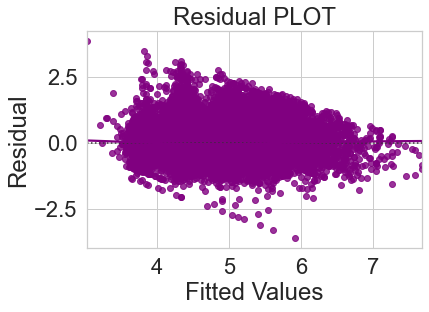

In [433]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### 4.  Test for Normality

**What is the test?**
* Error terms/Residuals should be normally distributed

**How to Check the Normality?**
* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

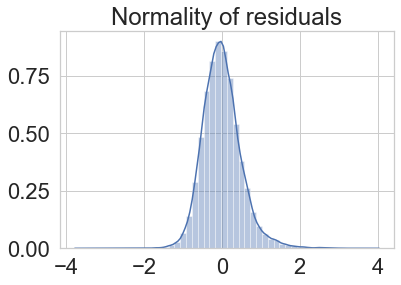

In [434]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

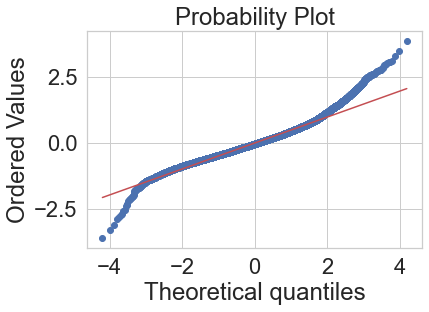

In [435]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

### 5.  Test for Homoscedasticity

* Test - goldfeldquandt test
* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

    Null hypothesis     : Residuals are homoscedastic
    Alternate hypothesis: Residuals have hetroscedasticity

In [436]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train1)
lzip(name, test)

[('F statistic', 0.9773785673594741), ('p-value', 0.9672577509453161)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Final model

In [437]:
y_pred_final = olsres1.predict(X_test1)

In [438]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train1, fitted))
print('RMSE for Training dataset:',rms)

rms1 = np.sqrt(mean_squared_error(y_test1, y_pred_final))
print('RMSE for Test dataset:',rms1)

RMSE for Training dataset: 0.4984506392332959
RMSE for Test dataset: 0.49613123139232157


In [439]:
# Mean Absolute Error on test
mae = mean_absolute_error(y_train1, fitted)
print('MAE for Training dataset:', mae)

mae1 = mean_absolute_error(y_test1, y_pred_final)
print('MAE for Test dataset:', mae1)

MAE for Training dataset: 0.3780842874621466
MAE for Test dataset: 0.3765684914899622


In [440]:
olsmod1 = sm.OLS(y_train1, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5105.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:17:33   Log-Likelihood:                -37484.
No. Observations:               51868   AIC:                         7.499e+04
Df Residuals:                   51856   BIC:                         7.510e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Observations from the model

1. With our linear regression model, we have been able to capture 52% variation in the data.
2. The model indicates that the most significant predictors of the log_price of Airbnb rentals are -
    - accommodates
    - bathrooms
    - review_scores_rating
    - bedrooms
    - beds
    - room_type
    - cancellation_policy
    - cleaning_fee
    - instant_bookable.
    
The p-value for all these predictor variables is <0.05 in our final model.
3. 1 unit increase in no.of accommodates,bathrooms and bedrooms leads to increase in log_price of properties by exp(0.0825), exp(0.1362) and exp(0.1564) respectiely, when everything else is constant.

It is important to note that the predicted values are log_price and therefore coefficients have to be converted accordingly to understand the increase in price.
4. Private & Shared rooms have a negative correlation with log_price.
5. Strict & Moderate cancellation policy has a negative correlation with log_price.
6. Properties charging cleaning fees is negatively correlated with log_price.
7. Properties that allow instant booking is negatively correlated with log_price.